In [1]:
import pandas as pd

from dpks.quant_matrix import QuantMatrix
from dpks.differential_testing import DifferentialTest

design_matrix_file = "../tests/input_files/de_design_matrix.tsv"

design_matrix = pd.read_csv(design_matrix_file, sep="\t")
design_matrix["batch"] = design_matrix["group"]
design_matrix

/Users/erikhartman/dev/DPKS/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[WARNING] nopython is set for njit and is ignored



,sample,group,batch
0,AAS_P2009_167,6,6
1,AAS_P2009_169,4,4
2,AAS_P2009_176,6,6
3,AAS_P2009_178,4,4
4,AAS_P2009_187,4,4
5,AAS_P2009_194,6,6
6,AAS_P2009_196,4,4
7,AAS_P2009_203,6,6
8,AAS_P2009_205,4,4
9,AAS_P2009_212,6,6


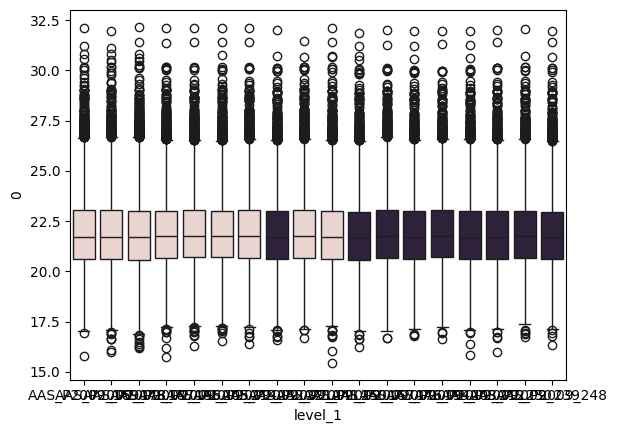

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file=design_matrix,
)

quantified_data = quant_matrix.filter().normalize(method="mean", batch_normalize=False)
plot_df = (
    quantified_data.to_df()
    .set_index("Protein")[design_matrix["sample"]]
    .stack()
    .reset_index()
)

plot_df = plot_df.merge(design_matrix, left_on="level_1", right_on="sample")
sns.boxplot(plot_df, x="level_1", y=0, hue="batch")
plt.legend().remove()

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


[WARNING] divide by zero encountered in true_divide



Adjusting the Data


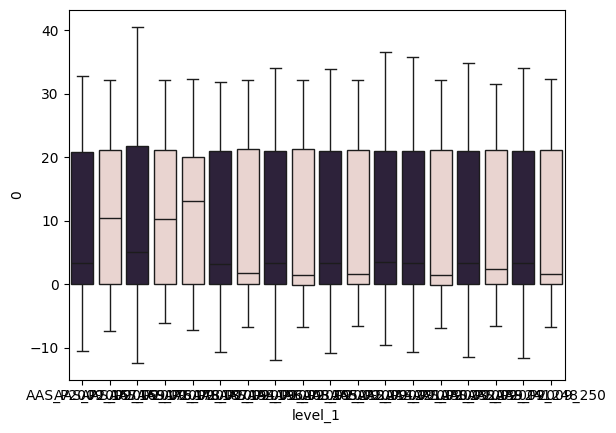

In [3]:
quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file=design_matrix,
)

quantified_data = quant_matrix.filter().normalize(method="mean", batch_normalize=True)

plot_df = (
    quantified_data.to_df()
    .set_index("Protein")[design_matrix["sample"]]
    .stack()
    .reset_index()
)
plot_df = plot_df.merge(design_matrix, left_on="level_1", right_on="sample")
sns.boxplot(plot_df, x="level_1", y=0, hue="batch")
plt.legend().remove()